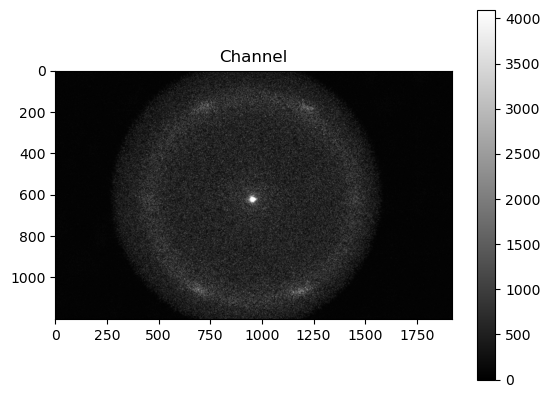

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

folder_path = r'F:\experiment\laser scattering system\test'
denoised_image_name = '1.tif'

image_path = fr'{folder_path}\{denoised_image_name}'
image = cv2.imread(image_path, -1)  
channel = image[:, :, 2]  #Blue, green, and red correspond to channel indices 0, 1, and 2.

plt.imshow(channel, cmap='gray')
plt.title("Channel")
plt.colorbar()
plt.show()

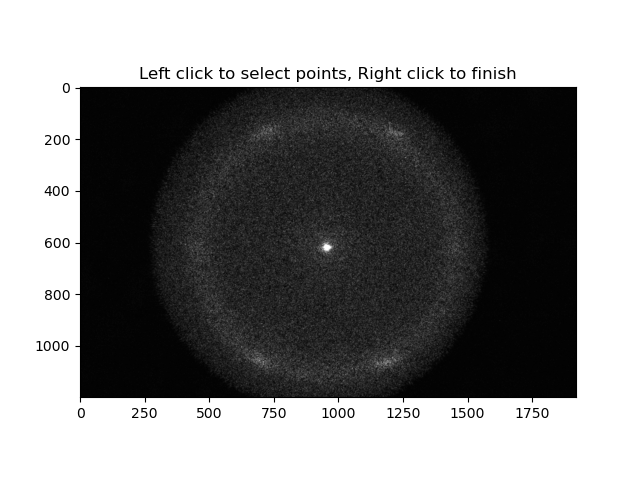

In [2]:
%matplotlib widget  
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title("Left click to select points, Right click to finish")
ax.imshow(channel, cmap='gray')

points = []
text_annotations = []  
def on_click(event):
    if event.inaxes != ax: 
        return
    
    if event.button == 1: 
        x, y = event.xdata, event.ydata
        points.append((x, y))
        point_plot = ax.plot(x, y, 'ro', markersize=8, alpha=0.7)[0]
        text = ax.text(
            x + 5, y,  
            str(len(points)), 
            color='yellow', 
            fontsize=12, 
            weight='bold'
        )
        text_annotations.append((point_plot, text))

        ax.set_title(f"Selected {len(points)} points (Left click to continue, Right click to finish)")
        fig.canvas.draw()
        
    elif event.button == 3:  
        for plot, text in text_annotations:
            plot.remove()
            text.remove()
        text_annotations.clear()

        ax.plot([p[0] for p in points], [p[1] for p in points], 'ro', markersize=6)
        ax.set_title("Point selection completed, fitting ellipse...")
        plt.close()

cid = fig.canvas.mpl_connect('button_press_event', on_click)
plt.show()

In [ ]:

points_array = np.array(points, dtype=np.float32)
ellipse = cv2.fitEllipse(points_array)  
(center_x, center_y), (minor_axis, major_axis), angle = ellipse
print(f"Center: ({center_x:.2f}, {center_y:.2f})")
print(f"major/minor: {major_axis:.2f}/{minor_axis:.2f}, angle: {angle:.2f}°")
eccentricity = (1-(minor_axis/major_axis)**2)**0.5
print(f"eccentricity:{eccentricity}")


Center: (947.87, 614.33)
major/minor: 1004.66/992.36, angle: 13.45°
eccentricity:0.15598300373678262


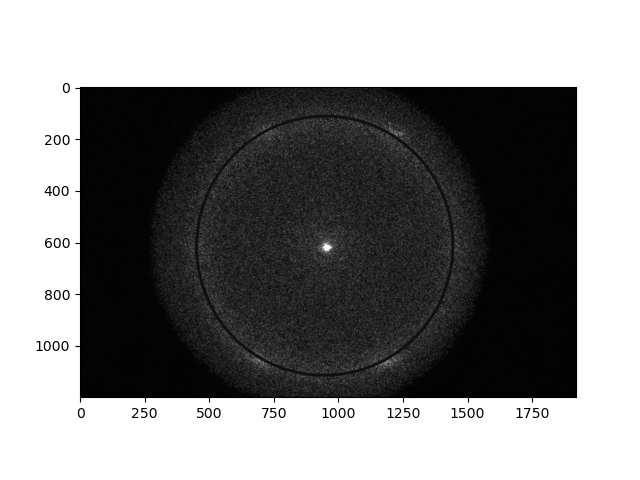

In [ ]:
center_x1 = int(center_x)
center_y1 = int(center_y)
minor_axis1 = int(minor_axis/2)
major_axis1 = int(major_axis/2)
output = channel.copy()
cv2.ellipse(output, (center_x1, center_y1), (minor_axis1, major_axis1), angle, 0, 360, (255, 255, 255), 10)  
plt.imshow(output, cmap='gray')
plt.show()